# TestFullNetwork.FullNetworkWithSigmoid
## test_transform1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np 
import torch.optim as optim 
import sys 
import os 
import matplotlib.pyplot as plt

In [2]:
project_basedir=os.path.join('..','..')
project_basedir = os.path.abspath(project_basedir)
sys.path.insert(0,project_basedir)
import tests.core.np.TestModels as models

In [3]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(2,2) 
        self.fc2 = nn.Linear(2,2)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x) 
        return x

Setting wieghts from the pyunit test code 

In [4]:
w = np.array([[1, 3], [0, 1]])
b = np.array([[-2, -3]]).T
y_act = np.array([[.5, .7]]).T
w2 = np.array([[.1, .2], [.3, .07]])
b2 = np.array([[.02, .3]]).T

In [5]:
input = torch.FloatTensor([[1, -1]])
print(input)
net = Net() 
net.fc1.weight = nn.Parameter( torch.FloatTensor([[1, 3], [0, 1]]))
net.fc1.bias   = nn.Parameter(torch.FloatTensor([[-2, -3]]))
net.fc2.weight = nn.Parameter(torch.FloatTensor([[.1, .2], [.3, .07]]))
net.fc2.bias   = nn.Parameter(torch.FloatTensor([[.02, .3]]))

tensor([[ 1., -1.]])


In [6]:
output = net(input)
print(output)

tensor([[0.0254, 0.3067]], grad_fn=<AddmmBackward>)


C:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [7]:
target = torch.FloatTensor([[.5, .7]])
target = target.view(1, -1)
criteria = nn.MSELoss()
loss = criteria(output, target)
optimizer = torch.optim.SGD(net.parameters(), lr=.001)

In [8]:
model = models.Transform1()

In [9]:
epoch = 0 
losses = [] 
av = [] 
x_axis=[] 
for x,y in model.data(15000):
    x_axis.append(epoch)
    epoch+=1
    # Forward Propagation
    pyx = torch.from_numpy(x.T).float() 
    pyy = torch.from_numpy(y.T).float()
    y_pred = net(pyx)
    # Compute and print loss
    loss = criteria(y_pred, pyy)
    losses.append(loss.item()) 
    if epoch %500 ==0 :
        last_100 = losses[-100:]
        average_l100 = sum(last_100) / len(last_100)
        av.append([epoch, average_l100])
        print('epoch: ', epoch,' loss: ', loss.item())
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward()
    
    # Update the parameters
    optimizer.step()
print("Final loss:{}".format(loss))
    
print('epoch: ', epoch,' loss: ', loss.item())

C:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch:  500  loss:  0.9270384907722473
epoch:  1000  loss:  0.32296431064605713
epoch:  1500  loss:  0.16144955158233643
epoch:  2000  loss:  0.45164430141448975
epoch:  2500  loss:  0.4925996661186218
epoch:  3000  loss:  0.21543672680854797
epoch:  3500  loss:  0.23326066136360168
epoch:  4000  loss:  0.06841116398572922
epoch:  4500  loss:  0.07545400410890579
epoch:  5000  loss:  0.19448907673358917
epoch:  5500  loss:  0.13613452017307281
epoch:  6000  loss:  0.0004751661908812821
epoch:  6500  loss:  0.08019828796386719
epoch:  7000  loss:  0.6934555172920227
epoch:  7500  loss:  0.6875044703483582
epoch:  8000  loss:  0.30673056840896606
epoch:  8500  loss:  0.06791895627975464
epoch:  9000  loss:  0.0750700905919075
epoch:  9500  loss:  0.03832416981458664
epoch:  10000  loss:  0.014643879607319832
epoch:  10500  loss:  0.7028822898864746
epoch:  11000  loss:  0.40688878297805786
epoch:  11500  loss:  0.0067593250423669815
epoch:  12000  loss:  0.0028567109256982803
epoch:  125

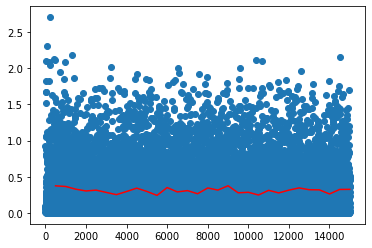

In [10]:
plt.scatter(x_axis, losses)
av_np = np.array(av)
plt.plot(av_np[:,0], av_np[:,1], 'r')
plt.show()

In [11]:
print(net.fc1.weight.data)
print("------------")
print(net.fc1.bias.data)


tensor([[1.1293, 2.9703],
        [0.0053, 0.9880]])
------------
tensor([[-2.0695, -3.0058]])


In [12]:
print(net.fc2.weight.data)
print("------------")
print(net.fc2.bias.data)

tensor([[-0.1740,  0.1745],
        [ 0.4355,  0.0159]])
------------
tensor([[ 0.0455, -0.0999]])
